In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
theta = 3*np.pi/2
phi_hat = [-np.sin(theta), np.cos(theta)]
print(phi_hat)

[1.0, -1.8369701987210297e-16]


In [4]:
x = -1
y = 1
np.arctan(x/y), 3*np.pi/4

(-0.7853981633974483, 2.356194490192345)

In [5]:
np.arctan2(y,x)

2.356194490192345

In [6]:
3*np.pi/4

2.356194490192345

In [7]:
import numpy as np
def b_wire(x, y):
    """
    Finds the magnetic field at point 'x' from a wire of current 'I' located at the origin.
    
    
    """
    I = -10    #Current in the wire (A) possitive current is out of the page, negative current is in the page
    mu = 4*np.pi*10**-7
    s = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x) #Remember arctan2 has inputs (y,x) for some reason.
    b_field = mu*I / (2*np.pi * s) * np.array([-np.sin(theta), np.cos(theta)])
    return b_field

In [8]:
b_wire(0.01,.01)

array([ 1.e-04, -1.e-04])

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


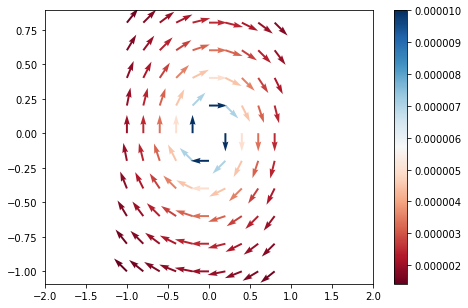

In [9]:
X, Y = np.mgrid[-1:1:.2, -1:1:.2]
U = b_wire(X,Y)
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U[0]/M, U[1]/M,M,cmap=plt.cm.RdBu)
plt.colorbar()
plt.xlim(-2,2)
plt.show()

In [10]:
import numpy as np
def b_wire2(x, w, I):
    """
    Finds the magnetic field at point 'x' from a wire of current 'I' located at the origin.
    
    
    """ 
    mu = 4*np.pi*10**-7
    dx = x[0] - w[0]
    dy = x[1] - w[1]
    s = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx) #Remember arctan2 has inputs (y,x) for some reason.
    b_field = mu*I / (2*np.pi * s) * np.array([-np.sin(theta), np.cos(theta)])
    return b_field

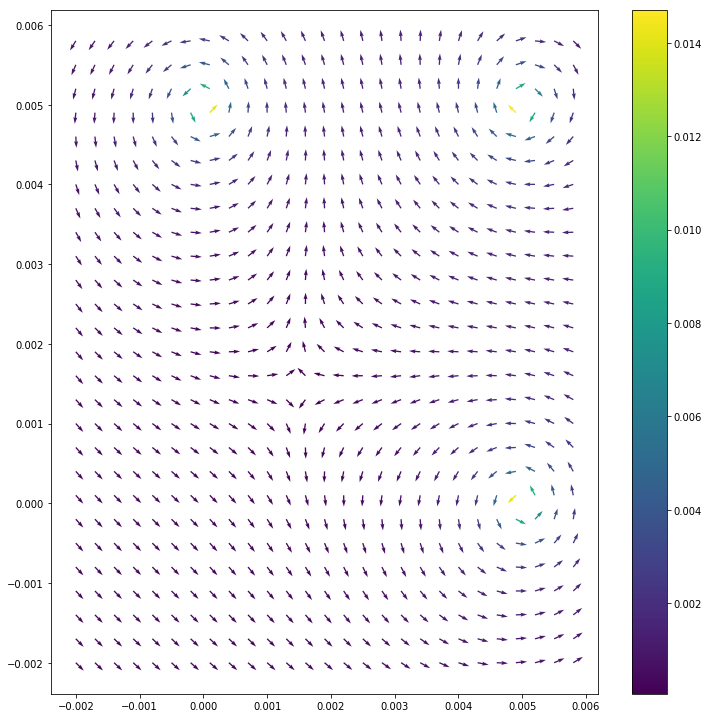

In [18]:
plt.figure(figsize = (10,10))
X, Y = np.mgrid[-.002:.0061:.0003, -.002:.0061:.0003]
U = multi_wire([X,Y])
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.axes([0.025, 0.025, 0.95, 0.95])
#plt.plot(ans[0],ans[1],'d', color = 'r')
plt.quiver(X, Y, U[0]/M, U[1]/M,M)
plt.colorbar()
plt.show()

In [12]:
import scipy.optimize

In [16]:
def multi_wire(x):
    return b_wire2(x,[0,.005],10) + 0*b_wire2(x,[0,0],-10) + b_wire2(x,[.005,.0],10) + b_wire2(x,[.005,.005],-10) 

In [17]:
def multi_wire_mag(x):
    B = multi_wire(x)
    mag = B[0]**2 + B[1]**2
    return mag

In [ ]:
ans = scipy.optimize.fmin(multi_wire_mag, [0.001,0.001], ftol = 1e-8)

In [ ]:
ans

In [ ]:
multi_wire(ans)

In [ ]:
plt.plot(0,0,'x', color = 'C0', label = 'Current into the page',markersize = 12)
plt.plot(0,0.5,'.', color = 'C0', label = 'Current out of the page', markersize = 12)
plt.plot(0.5, 0.5, 'x', color = 'C0', markersize = 12)
plt.plot(0.5, 0, '.', color = 'C0', markersize = 12)
plt.xlabel('Distance (cm)', size = 12)
plt.ylabel('Distance (cm)', size = 12)
plt.xlim(-.1,.6)
plt.ylim(-.1, .6)
plt.legend(loc = 0)
plt.title('Ideal Wire set up for HW 5', size = 14)
plt.savefig('HW 5 Picture')
plt.show()

In [ ]:
plt.plot(0,0,'x', color = 'C0', label = 'Current into the page',markersize = 12)
plt.annotate('[0,0], $I = -9.9$A', xy=(0, -.07), xytext=(0.0, -0.07))

plt.plot(0.07,0.45,'.', color = 'C0', label = 'Current out of the page', markersize = 12)
plt.annotate('[0.07,0.45], $I = 8.9$A', xy=(0.07, .45), xytext=(0.0, .5))

plt.plot(0.52, 0.43, 'x', color = 'C0', markersize = 12)
plt.annotate('[0.52,0.43], $I = -10.3$A', xy=(.52, .43), xytext=(0.33, .38))

plt.plot(0.47, -0.08, '.', color = 'C0', markersize = 12)
plt.annotate('[0.47,-0.08], $I = 12.4$A', xy=(0.47, -.08), xytext=(0.34, -.04))

plt.xlabel('Distance (cm)', size = 12)
plt.ylabel('Distance (cm)', size = 12)
plt.xlim(-.1,.6)
plt.ylim(-.1, .6)
plt.legend(loc = 0)
plt.title('Non-Ideal Wire set up for HW 5', size = 14)
plt.savefig('HW 5 Picture 2')
plt.show()

In [ ]:
import numpy
from matplotlib import pyplot

x = numpy.arange(10)
y = numpy.array([5,3,4,2,7,5,4,6,3,2])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
pyplot.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()